In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

In [4]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
x=0
y=0

def nothing(x):
    pass

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y
        img[:50,:500,]=0
        cv2.putText(img,'Mouse : ('+ str(ix) +', '+ str(iy)+')',(10,30), font, 0.7,(255,255,255),2,cv2.LINE_AA)
        drawing = True
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            '''if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,0,255),0)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),0)'''
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.putText(img,' - ('+ str(x) +', '+ str(y)+')',(230,30), font, 0.7,(255,255,255),2,cv2.LINE_AA)
        drawing = False
        if mode == True:
            '''cv2.rectangle(img,(ix,iy),(x,y),(0,0,255),-1)'''
            img[iy:y,ix:x,:2]=0
        else:
            '''cv2.circle(img,(x,y),5,(0,0,255),-1)'''
            img[iy:y,ix:x,:2]=0

In [5]:
'''def draw_circle(event,x,y,flags,param):
    global img,ix,iy
    ix,iy = x,y
    
    if event == cv2.EVENT_LBUTTONDBLCLK:
        img[:50,:230,]=0
        cv2.putText(img,'Mouse : '+ str(ix) +', '+ str(iy),(10,30), font, 0.7,(255,255,255),2,cv2.LINE_AA)
        cv2.circle(img,(x,y),25,(random.randrange(0,255),random.randrange(0,255),random.randrange(0,255)),2)
'''
img=cv2.imread("messi5.jpg",1)
'''img = np.zeros((512,512,3), np.uint8)'''
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.namedWindow('image')
cv2.createTrackbar('Gray Scale','image',0,255,nothing)
cv2.setMouseCallback('image',draw_circle)

In [6]:
while(1):
    cv2.imshow('image',img)
    
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

BLUE=[255,0,0]
img = cv2.imread('messi5.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img[10,10,:]=[255,255,255]



In [8]:
img.shape

(599, 800, 3)

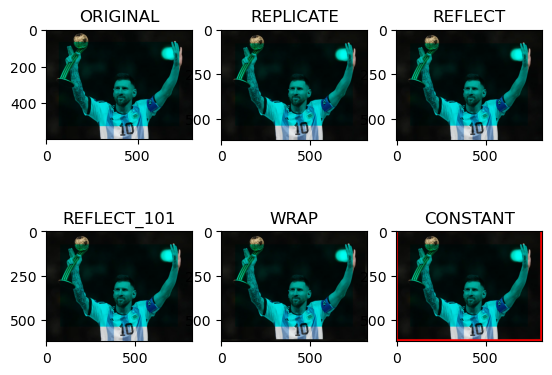

In [9]:
img = cv2.imread('messi5.jpg')
img = cv2. cvtColor (img, cv2.COLOR_BGR2RGB)

img[70:-70,70:-70,0]=0

replicate = cv2. copyMakeBorder(img, 10,10, 10, 10, cv2. BORDER_REPLICATE)
reflect = cv2. copyMakeBorder (img, 10, 10, 10, 10, cv2. BORDER_REFLECT)
reflect101 = cv2. copyMakeBorder (img, 10, 10, 10, 10, cv2. BORDER_REFLECT_101)
wrap = cv2. copyMakeBorder (img, 10,10, 10, 10, cv2. BORDER_WRAP)
constant= cv2. copyMakeBorder (img, 10, 10, 10, 10, cv2. BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img, 'gray'),plt.title("ORIGINAL")
plt.subplot (232),plt.imshow(replicate, 'gray'),plt.title('REPLICATE')
plt.subplot (233),plt.imshow(reflect, 'gray'),plt.title('REFLECT')
plt.subplot (234),plt.imshow(reflect101, 'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap, 'gray'),plt.title("WRAP")
plt.subplot (236) ,plt.imshow(constant, 'gray'),plt.title('CONSTANT')

plt.show()

In [18]:
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

NameError: name 'plt' is not defined

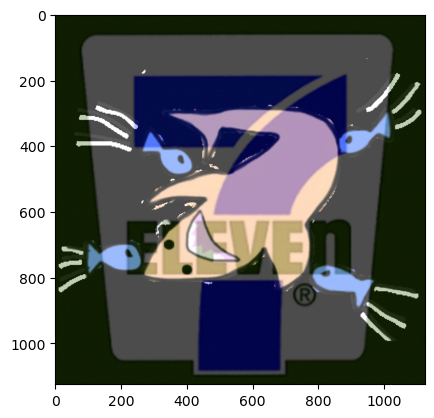

In [23]:
img1=cv2.imread('meuyo.png')
img2=cv2.imread('7eleven.jpg')

img3=cv2.resize(img2,(img1.shape[1],img1.shape[0]))

dst = cv2.addWeighted(img1,0.7,img3,0.3,0)

plt.imshow(dst)



In [24]:
# Load two images
img2 = cv2.imread('images.png')
img1 = cv2.imread('messi5.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 203, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


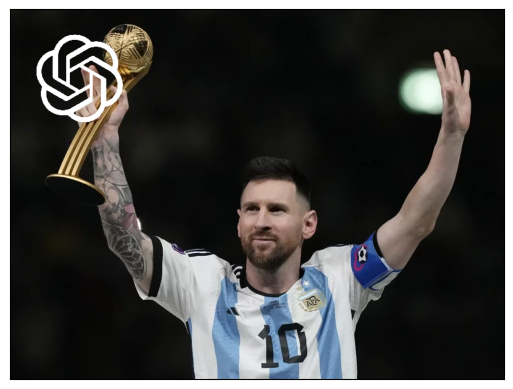

In [25]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

img3=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img3)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [15]:
import cv2
import numpy as np
cap = cv2.VideoCapture('tracking2.avi')
while(cap.isOpened()):
    # Take each frame
    ret, frame = cap.read()
    if ret == False:
        break
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
